In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
import folium

In [2]:
df = pd.read_csv("Resource/rideshare_kaggle.csv")
# Check basic info
print(df.info())  # To see data types and null values
print(df.head())  # To see a snapshot of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [34]:
# For categorical columns, replace NaN with 'Unknown'
categorical_columns = ['cab_type', 'source', 'destination', 'product_id', 'name']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# For numeric columns, replace NaN with the median
numeric_columns = ['price', 'distance', 'temperature', 'humidity']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [35]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype                           
---  ------                       --------------   -----                           
 0   id                           693071 non-null  object                          
 1   timestamp                    693071 non-null  datetime64[ns, America/New_York]
 2   hour                         693071 non-null  int32                           
 3   day                          693071 non-null  int32                           
 4   month                        693071 non-null  int32                           
 5   datetime                     693071 non-null  datetime64[ns]                  
 6   timezone                     693071 non-null  object                          
 7   source                       693071 non-null  object                          
 8   destination                  693071 non-null

In [4]:
# Convert timestamp and datetime to pandas datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert latitude and longitude to float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Convert price and distance to float
df['price'] = df['price'].astype(float)
df['distance'] = df['distance'].astype(float)

In [6]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1970-01-01 00:00:01.544952607,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1970-01-01 00:00:01.543284023,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1970-01-01 00:00:01.543366822,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1970-01-01 00:00:01.543553582,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1970-01-01 00:00:01.543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
# Normalize text columns (convert to lowercase)
df['cab_type'] = df['cab_type'].str.lower()
df['source'] = df['source'].str.lower()
df['destination'] = df['destination'].str.lower()

In [8]:
# Replace inconsistent values
df['cab_type'] = df['cab_type'].replace({'uber ': 'uber', 'lyff': 'lyft'})

In [9]:
# Convert timestamp to a specific timezone if needed
df['timestamp'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

In [10]:
# Extract hour, day, month, etc., from 'datetime' if needed
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday

In [11]:
df['timestamp'].head()  # Check the first few values of the 'timestamp' column
df['datetime'].head()   # Check the first few values of the 'datetime' column

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: datetime, dtype: datetime64[ns]

In [12]:
# Check min/max for temperature columns
df[['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow']].describe()

,temperature,apparentTemperature,temperatureHigh,temperatureLow
count,693071.000000,693071.000000,693071.000000,693071.000000
mean,39.584388,35.881222,45.040982,34.150736
std,6.726084,7.918707,5.996541,6.383163
min,18.910000,12.130000,32.680000,17.850000
25%,36.450000,31.910000,42.570000,30.170000
50%,40.490000,35.900000,44.680000,34.180000
75%,43.580000,40.080000,46.910000,38.730000
max,57.220000,57.220000,57.870000,46.600000


In [13]:
# Check for outliers or unrealistic values in windSpeed or humidity
df[['windSpeed', 'humidity']].describe()

,windSpeed,humidity
count,693071.000000,693071.000000
mean,6.186253,0.741119
std,3.148223,0.138595
min,0.450000,0.380000
25%,3.410000,0.640000
50%,5.910000,0.710000
75%,8.410000,0.880000
max,15.000000,0.960000


In [14]:
# Check valid latitude/longitude range
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]

In [15]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Create a weekend column (True for weekends, False for weekdays)
df['is_weekend'] = df['day_of_week'] >= 5

In [16]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype                           
---  ------                       --------------   -----                           
 0   id                           693071 non-null  object                          
 1   timestamp                    693071 non-null  datetime64[ns, America/New_York]
 2   hour                         693071 non-null  int32                           
 3   day                          693071 non-null  int32                           
 4   month                        693071 non-null  int32                           
 5   datetime                     693071 non-null  datetime64[ns]                  
 6   timezone                     693071 non-null  object                          
 7   source                       693071 non-null  object                          
 8   destination                  693071 non-null

In [18]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,weekday,day_of_week,is_weekend
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1969-12-31 19:00:01.544952607-05:00,9,16,12,2018-12-16 09:30:07,America/New_York,haymarket square,north station,lyft,...,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,6,6,True
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1969-12-31 19:00:01.543284023-05:00,2,27,11,2018-11-27 02:00:23,America/New_York,haymarket square,north station,lyft,...,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,1,False
2,981a3613-77af-4620-a42a-0c0866077d1e,1969-12-31 19:00:01.543366822-05:00,1,28,11,2018-11-28 01:00:22,America/New_York,haymarket square,north station,lyft,...,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,2,2,False
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1969-12-31 19:00:01.543553582-05:00,4,30,11,2018-11-30 04:53:02,America/New_York,haymarket square,north station,lyft,...,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,4,4,False
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1969-12-31 19:00:01.543463360-05:00,3,29,11,2018-11-29 03:49:20,America/New_York,haymarket square,north station,lyft,...,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,3,3,False


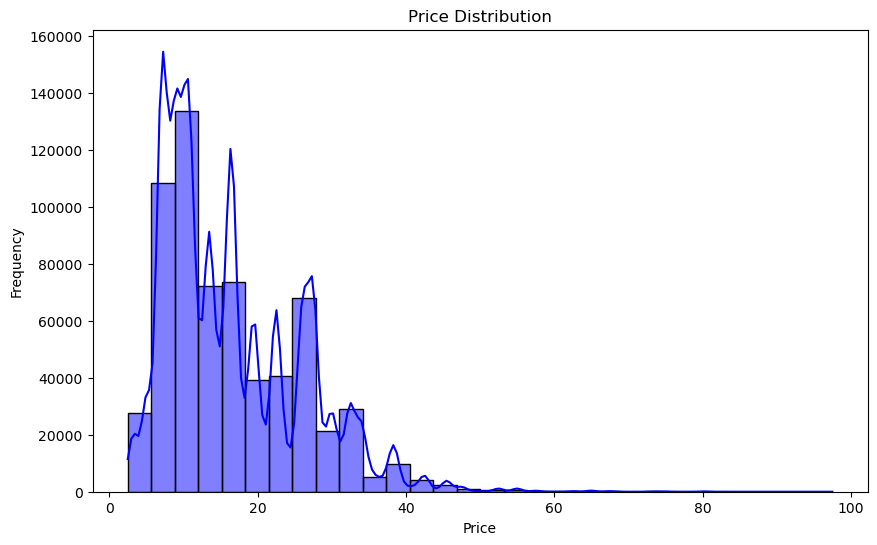

In [20]:
# Plot the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

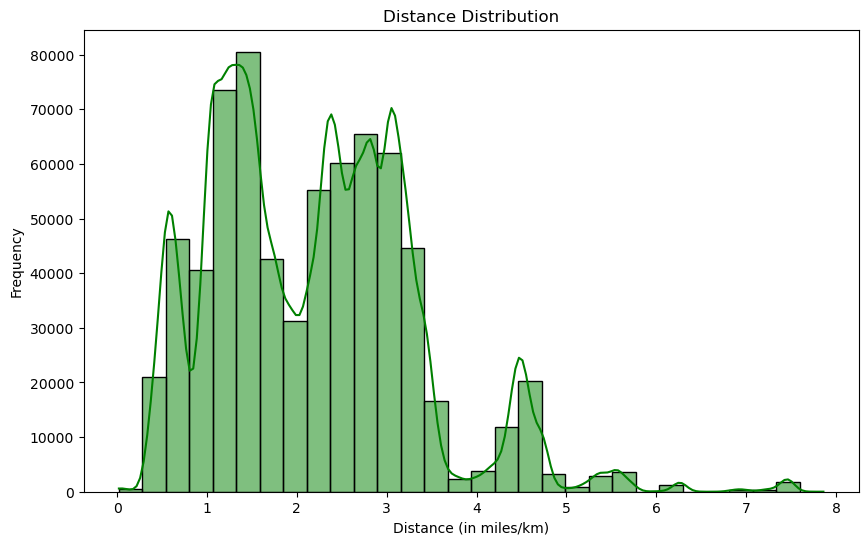

In [21]:
# Plot the distribution of distance
plt.figure(figsize=(10, 6))
sns.histplot(df['distance'], kde=True, color='green', bins=30)
plt.title('Distance Distribution')
plt.xlabel('Distance (in miles/km)')
plt.ylabel('Frequency')
plt.show()

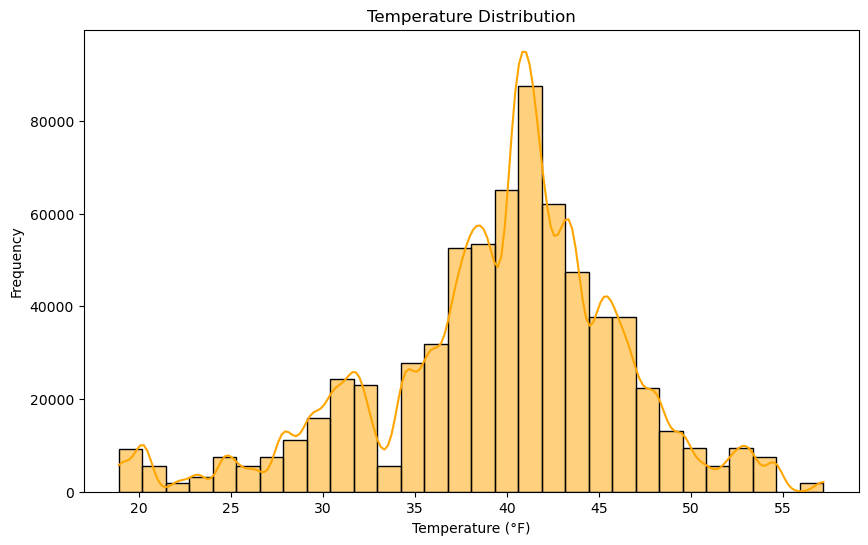

In [23]:
# Plot the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True, color='orange', bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

/var/folders/29/_ttgq8qj3rb6q904qtqm6n140000gn/T/ipykernel_34264/2445532982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='coolwarm')


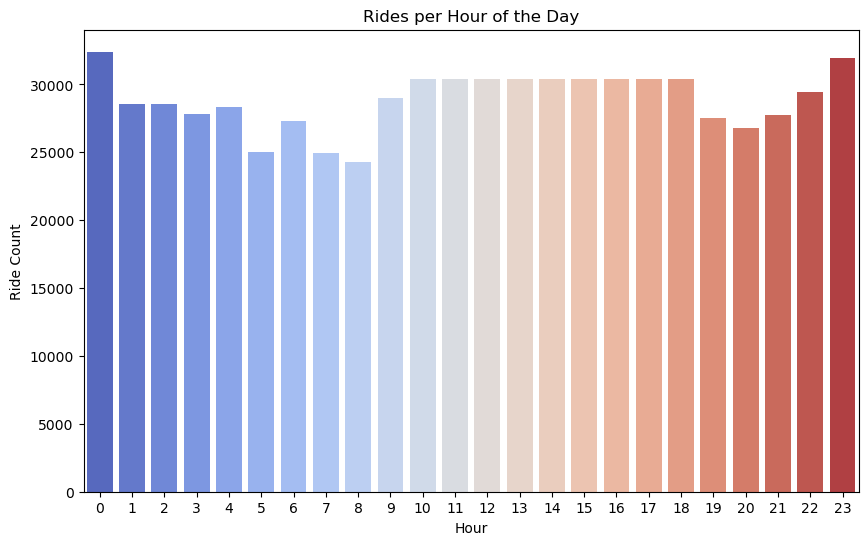

/var/folders/29/_ttgq8qj3rb6q904qtqm6n140000gn/T/ipykernel_34264/2445532982.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, palette='coolwarm')


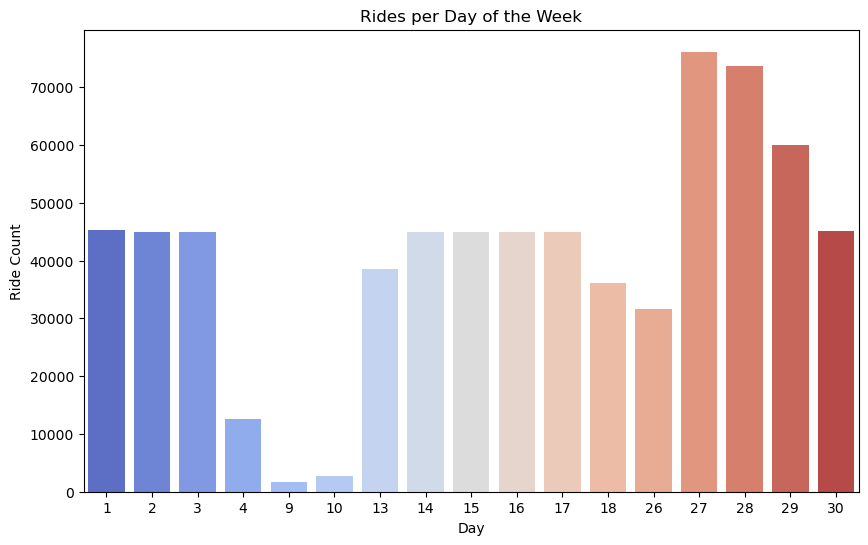

/var/folders/29/_ttgq8qj3rb6q904qtqm6n140000gn/T/ipykernel_34264/2445532982.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='coolwarm')


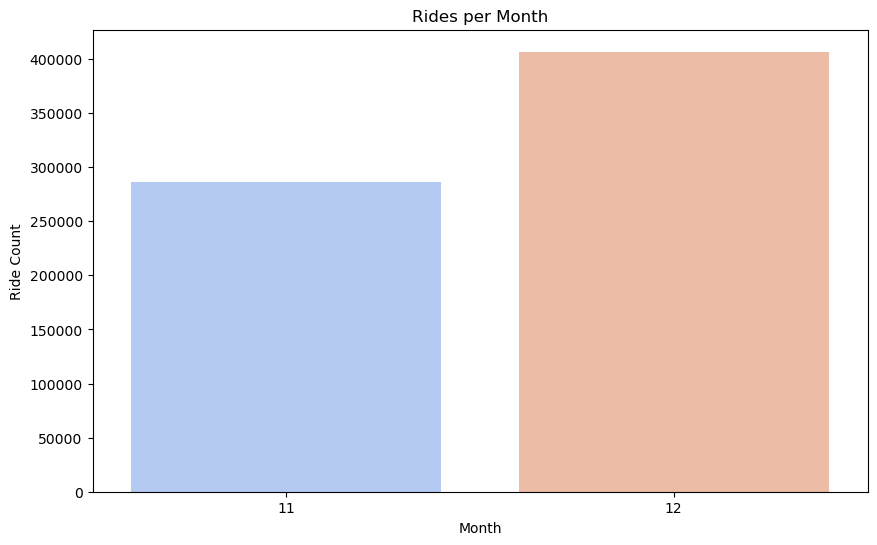

In [24]:
# Hour of the day distribution (rides per hour)
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Rides per Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.show()

# Day of the week distribution (rides per day)
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=df, palette='coolwarm')
plt.title('Rides per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Ride Count')
plt.show()

# Month of the year distribution (rides per month)
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='coolwarm')
plt.title('Rides per Month')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.show()

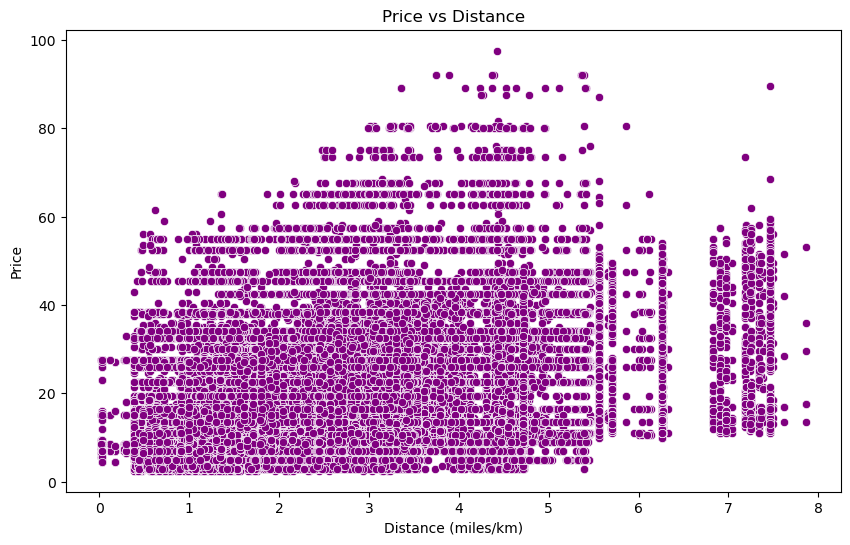

In [25]:
# Scatter plot of price vs distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=df, color='purple')
plt.title('Price vs Distance')
plt.xlabel('Distance (miles/km)')
plt.ylabel('Price')
plt.show()

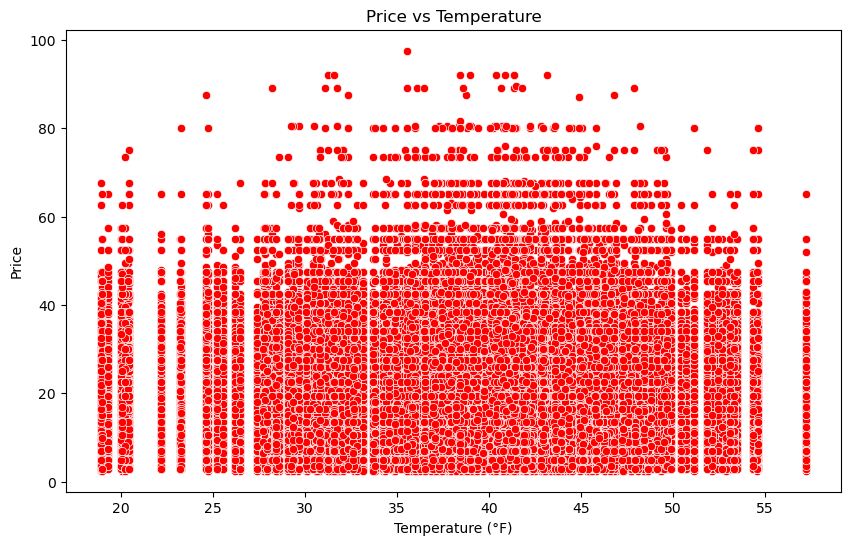

In [27]:
# Scatter plot of price vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='price', data=df, color='red')
plt.title('Price vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Price')
plt.show()


/var/folders/29/_ttgq8qj3rb6q904qtqm6n140000gn/T/ipykernel_34264/1769910275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='price', data=df, palette='Set2')


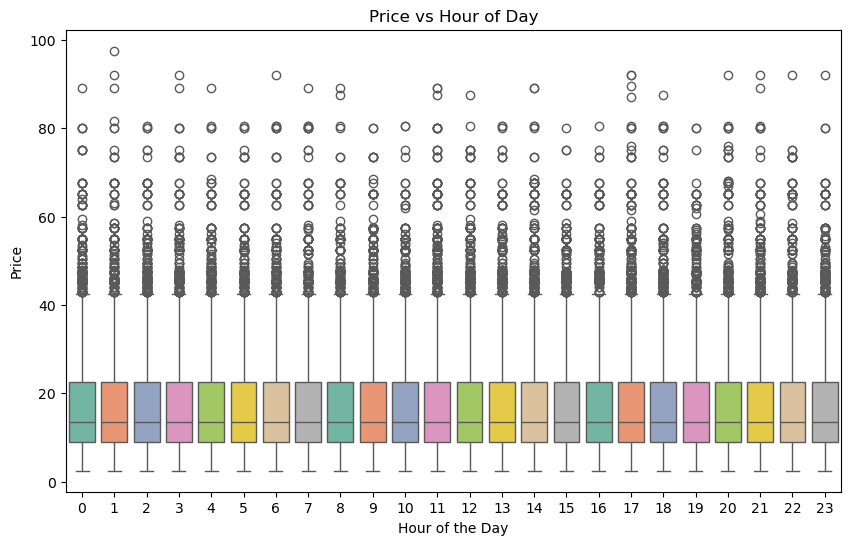

In [28]:
# Boxplot of price by hour of the day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='price', data=df, palette='Set2')
plt.title('Price vs Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')
plt.show()

/var/folders/29/_ttgq8qj3rb6q904qtqm6n140000gn/T/ipykernel_34264/299267949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surge_multiplier', y='price', data=df, palette='coolwarm')


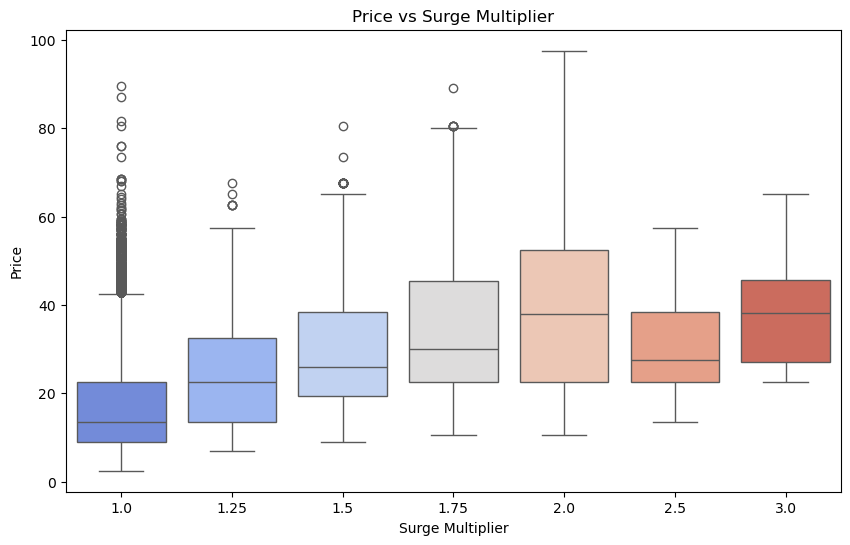

In [29]:
# Boxplot of price by surge multiplier
plt.figure(figsize=(10, 6))
sns.boxplot(x='surge_multiplier', y='price', data=df, palette='coolwarm')
plt.title('Price vs Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Price')
plt.show()

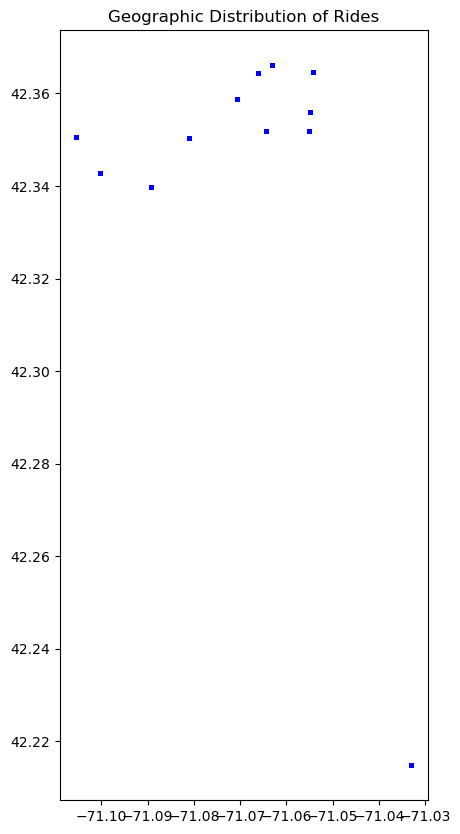

In [30]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from latitude and longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the points on a map
gdf.plot(marker='o', color='blue', markersize=5, figsize=(12, 10))
plt.title('Geographic Distribution of Rides')
plt.show()

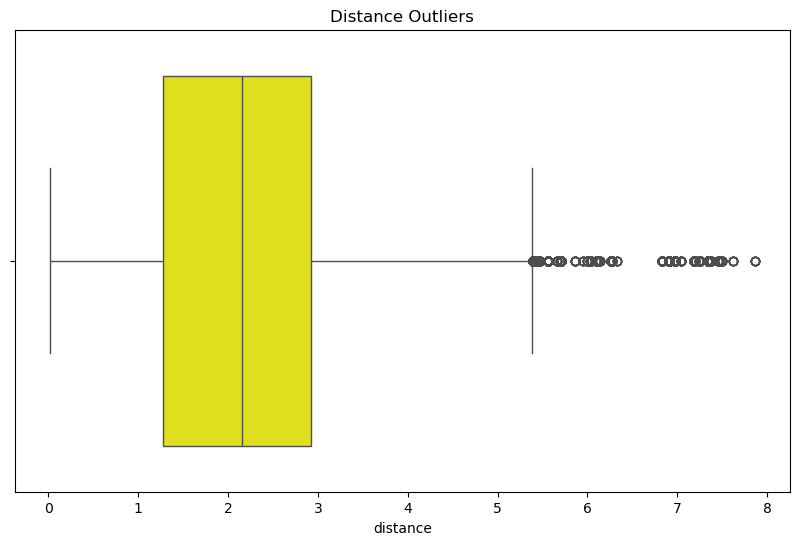

In [32]:
# Boxplot for distance (to detect outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['distance'], color='yellow')
plt.title('Distance Outliers')
plt.show()

In [33]:
df.to_csv("Resource/cleaned_rideshare.csv", index=False)

In [41]:
df2 = df.sample(frac=0.2, random_state=50)

In [42]:
df2.to_csv("Resource/sampled_rideshare.csv", index=False)